In [1]:
# Modified from Jimmy Chang's codes

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 28, 28)
training labels (60000,)
testing inputs (10000, 28, 28)
testing inputs (10000,)


In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 784)
training labels (60000, 10)
testing inputs (10000, 784)
testing inputs (10000, 10)


In [6]:
''' For categorical_crossentropy '''
model_ce = Sequential()
model_ce.add(Dense(512, input_dim=x_train.shape[1]))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(512))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(10))
model_ce.add(Activation('softmax'))

# print 'Building a model whose loss function is mean_squared_error'
''' For mean_squared_error '''
model_mse = Sequential()
model_mse.add(Dense(512, input_dim=x_train.shape[1]))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(512))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(10))
model_mse.add(Activation('softmax'))

In [7]:
''' Set up the optimizer '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

''' Compile model with specified loss and optimizer '''
model_ce.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])

model_mse.compile(loss= 'mean_squared_error',
                  optimizer=sgd,
                  metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

'''Fit models and use validation_split=0.1 '''
history_ce = model_ce.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          shuffle=True,
                          validation_split=0.1)

history_mse = model_mse.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            shuffle=True,
                            validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 19s 358us/step - loss: 1.8226 - acc: 0.4602 - val_loss: 1.0545 - val_acc: 0.7405
Epoch 2/30
54000/54000 [==============================] - 18s 333us/step - loss: 0.7729 - acc: 0.8041 - val_loss: 0.5042 - val_acc: 0.8803
Epoch 3/30
54000/54000 [==============================] - 18s 338us/step - loss: 0.5100 - acc: 0.8593 - val_loss: 0.3830 - val_acc: 0.9022
Epoch 4/30
54000/54000 [==============================] - 19s 344us/step - loss: 0.4267 - acc: 0.8791 - val_loss: 0.3330 - val_acc: 0.9067
Epoch 5/30
54000/54000 [==============================] - 18s 333us/step - loss: 0.3876 - acc: 0.8892 - val_loss: 0.3077 - val_acc: 0.9132
Epoch 6/30
54000/54000 [==============================] - 17s 322us/step - loss: 0.3633 - acc: 0.8959 - val_loss: 0.2903 - val_acc: 0.9190
Epoch 7/30
54000/54000 [==============================] - 17s 322us/step - loss: 0.3463 - acc: 0.9002 - val_loss: 0.2

Epoch 29/30
54000/54000 [==============================] - 15s 279us/step - loss: 0.0651 - acc: 0.5681 - val_loss: 0.0633 - val_acc: 0.6045
Epoch 30/30
54000/54000 [==============================] - 15s 279us/step - loss: 0.0634 - acc: 0.5881 - val_loss: 0.0614 - val_acc: 0.6322


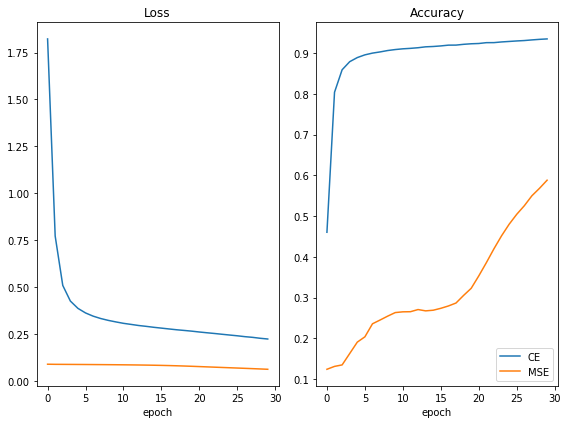

Result saved into 01_lossFuncSelection.png


In [8]:
'''Access the loss and accuracy in every epoch'''
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')
loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.xlabel("epoch")
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('01_lossFuncSelection.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 01_lossFuncSelection.png')